<a href="https://colab.research.google.com/github/rajkgoel/AW-Internet-Sales1/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. KNN
# 2. SMOTE

# KNN

K-Nearest Neighbors (KNN) predicts using the labels/values of the nearest data points.

No training equation.
No weights.
Just distance + neighbors.

2️⃣ Core idea (very intuitive)

Given a new point:

Compute distance to all training points

Pick K closest

Decide:

Classification → majority vote

Regression → average value

3️⃣ Real-world analogy 🧠

Imagine you move to a new area and ask:
“Is this neighborhood safe?”

You ask your K nearest neighbors:
 - If most say yes → you say yes
 - If most say no → you say no

That’s KNN.

4️⃣ Classification vs Regression in KNN
| Task |	How output is computed |
| --- | --- |
| Classification |	Majority class |
| Regression	| Mean of neighbors |


Example
```
Neighbors' labels → [1, 1, 0]
Prediction → 1
```

5️⃣ Distance matters (VERY important)

Most common: Euclidean distance

$$ d= \sqrt{(x_1 - x_2)^2 + (y_1 -y_2)^2} $$
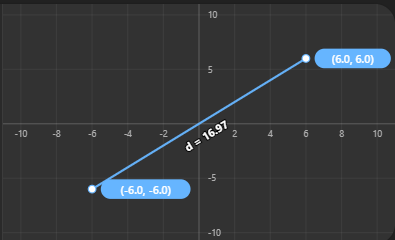
👉 This immediately tells you: Feature scaling is mandatory in KNN

Otherwise:
- Large-scale feature dominates distance
- Wrong neighbours selected

6️⃣ Choosing K (critical)
| K value	| Behavior |
| --- | --- |
|Small K (e.g., 1) |	Overfitting |
|Large K |	Underfitting |
|Moderate K	| Good generalization |



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = np.array([[1], [2], [3], [6], [7], [8]])
y = np.array([0, 0, 0, 1, 1, 1])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

print(knn.predict([[4]]))
print(knn.predict_proba([[5]]))


[0]
[[0.33333333 0.66666667]]


8️⃣ What happened internally

For input 5:

Finds 3 nearest points

Their labels might be [1, 1, 0]

Majority → 1

One-line mental model 🧠

A new point joins the group that most of its nearby friends belong to.

**Choosing the right KNN** -

Step 1️⃣ What are we actually trying to do?

We want the K that works well on unseen data, not just training data.

That means:
- Try many K values
- Measure performance each time

Pick the K with best validation score

Step 2️⃣ How Cross-Validation helps here

Instead of trusting one split, we:
1. Split data into folds (say 5)
2. Try a K
3. Train on 4 folds, validate on 1
4. Repeat
5. Average the score

This gives a reliable estimate.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

X = np.array([[1], [2], [3], [6], [7], [8]])
y = np.array([0, 0, 0, 1, 1, 1])

for k in [1, 3]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=2)
    print(f"K={k}, Accuracy={scores.mean():.2f}")


K=1, Accuracy=1.00
K=3, Accuracy=0.33


One-line interview answer (gold 🔑)

In KNN with cross-validation, K must be smaller than the number of training samples in each fold; otherwise scoring fails.

If you have 100 samples and use 5-fold CV, what is the maximum safe K?
Answer - 80

**Why 80 is the maximum safe K**

- Total samples = 100
- 5-fold CV → each fold:
  - Train = 80
  - Validation = 20

👉 KNN can use at most 80 neighbors, because:

Neighbors are chosen only from the training set, never from validation data.

**Distance metrics tuning (Euclidean vs Manhattan)**

KNN decides everything based on distance.
Change the distance → change the neighbors → change the prediction.

So:

> Distance metric = model behavior

2️⃣ Most common distance metrics (intuition first)

🔹 Euclidean (p = 2)

“Straight-line distance”

Sensitive to large differences

Works well when features are smooth & continuous

Example:
> GPS coordinates, height–weight

🔹 Manhattan (p = 1)

“City-block distance”

Adds absolute differences

Less sensitive to outliers

Example:
> Grid paths, discrete jumps

🔹 Minkowski (generalized)

Controls distance using parameter p:
 - p=1 → Manhattan
 - p=2 → Euclidean

Imagine two features:
 - Age
 - Income

Two people differ:
- Age difference = 20
- Income difference = 5

Euclidean:
$ \sqrt{(20^2 + 5^2)} = large $

Manhattan:
$ 20 + 5 = moderate $

➡ Euclidean amplifies large gaps more.

4️⃣ When to prefer which
| Situation |	Better metric |
| --- | --- |
| Outliers present |	Manhattan |
| Smooth numeric features	| Euclidean |
| High dimensions	| Manhattan often safer |
| Grid-like movement |	Manhattan |



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for p in [1, 2]:
    knn = KNeighborsClassifier(n_neighbors=3, p=p)
    scores = cross_val_score(knn, X, y, cv=3)
    print(f"p={p}, Accuracy={scores.mean():.2f}")


p=1, Accuracy=1.00
p=2, Accuracy=1.00


6️⃣ Important connection to feature scaling

Even Manhattan needs scaling.

Without scaling:
- Big features dominate absolute differences
- Wrong neighbors again

7️⃣ Interview-ready takeaway 🔑

In KNN, the distance metric defines similarity; Euclidean emphasizes large differences, while Manhattan is more robust to outliers.

# SMOTE
SMOTE (Synthetic Minority Oversampling Technique) creates new minority-class data points by interpolating between existing ones.

It does NOT:
- Copy rows
- Add noise randomly

It creates realistic synthetic points.

1️⃣ Why do we need SMOTE?
Problem: Imbalanced data

Example:

```
Fraud → 2%
Not Fraud → 98%
```
A dumb model that predicts “Not Fraud always” gets:
```
Accuracy = 98%
```
…but is useless.

3️⃣ How SMOTE works (step-by-step)

For each minority point:

Find its k nearest minority neighbors

Pick one neighbor

Create a new point between them

Mathematically:
$ new point = x + λ(x_neighbour -x) $

where 0 < λ < 1

4️⃣ Visual intuition 🧠

Minority points:

```
•       •
     •
```
SMOTE fills the space between them, not outside.




5️⃣ Why SMOTE is better than oversampling

| Method | Problem |
| --- | --- |
| Random oversampling |	Overfitting (duplicates) |
| Undersampling |	Data loss |
| SMOTE |	Balanced + generalizes |


6️⃣ Where SMOTE fits in the ML pipeline

🚨 Very important order:
```
Train/Test Split
   ↓
SMOTE on TRAIN ONLY
   ↓
Scaling (if needed)
   ↓
Model
```
❌ Never apply SMOTE before splitting — data leakage.

In [12]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = np.array([[1], [2], [3], [4]])
y = np.array([0, 0, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before:\n", pd.Series(y_train).value_counts())
print("After:\n", pd.Series(y_train_sm).value_counts())

ValueError: The test_size = 1 should be greater or equal to the number of classes = 2